In [4]:
import anndata
dir = '/projects/zhanglab/users/johnson/gene_downsampled_data_processed/Cano_filtered_sampled_7K_downsample_0.3.h5ad'
adata = anndata.read_h5ad(dir)
adata

AnnData object with n_obs × n_vars = 6999 × 2000
    obs: 'cell.type', 'cytokine.condition', 'donor.id', 'batch.10X', 'nGene', 'nUMI', 'percent.mito', 'S.Score', 'G2M.Score', 'Phase', 'cluster.id', 'effectorness', 'n_genes'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p', 'neighbors_correlation', 'neighbors_l2'
    obsp: 'dm_correlation', 'dm_cosine', 'dm_l1', 'dm_l2', 'neighbors_correlation_connectivities', 'neighbors_correlation_distances', 'neighbors_l2_connectivities', 'neighbors_l2_distances'

In [2]:
adata.X.toarray()

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
import scanpy as sc
import os

# Define the dataset directory and output directory
dataset_dir = '/projects/zhanglab/users/johnson/gene_downsampled_data'
output_dir = '/projects/zhanglab/users/johnson/gene_downsampled_data_processed'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# List all files in the dataset directory
files = [f for f in os.listdir(dataset_dir) if f.endswith('.h5ad')]

print(f"Found {len(files)} datasets to process.")

# Process each dataset
for file in files:
    dataset_path = os.path.join(dataset_dir, file)
    output_path = os.path.join(output_dir, file)

    print(f"\nProcessing dataset: {file}")
    
    # Read the dataset
    print(f"Loading dataset from {dataset_path}")
    adata_raw = sc.read_h5ad(dataset_path)

    # Normalization
    print("Normalizing data")
    sc.pp.normalize_total(adata_raw, target_sum=1e4)

    # Log transform
    print("Applying log transformation")
    sc.pp.log1p(adata_raw)

    # High-variable gene selection
    print("Selecting highly variable genes")
    sc.pp.highly_variable_genes(adata_raw, flavor='seurat', n_top_genes=2000)

    # Subset the data to highly variable genes
    adata_raw = adata_raw[:, adata_raw.var['highly_variable']]

    # Calculate neighbors using L2 and Correlation metrics
    for metric in ['l2', 'correlation']:
        print(f"Calculating {metric} neighbors")
        sc.pp.neighbors(adata_raw, n_neighbors=10, metric=metric, use_rep='X', key_added=f'neighbors_{metric}')

    # Save the processed dataset
    print(f"Saving processed dataset to {output_path}")
    adata_raw.write_h5ad(output_path)

print("\nProcessing complete.")

Found 20 datasets to process.

Processing dataset: TMSfacs_filtered_sampled_7K_downsample_0.7.h5ad
Loading dataset from /projects/zhanglab/users/johnson/gene_downsampled_data/TMSfacs_filtered_sampled_7K_downsample_0.7.h5ad
Normalizing data
Applying log transformation
Selecting highly variable genes


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Calculating l2 neighbors
Calculating correlation neighbors
Saving processed dataset to /projects/zhanglab/users/johnson/gene_downsampled_data_processed/TMSfacs_filtered_sampled_7K_downsample_0.7.h5ad

Processing dataset: TMSfacs_filtered_sampled_7K_downsample_0.3.h5ad
Loading dataset from /projects/zhanglab/users/johnson/gene_downsampled_data/TMSfacs_filtered_sampled_7K_downsample_0.3.h5ad
Normalizing data
Applying log transformation
Selecting highly variable genes


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Calculating l2 neighbors
Calculating correlation neighbors
Saving processed dataset to /projects/zhanglab/users/johnson/gene_downsampled_data_processed/TMSfacs_filtered_sampled_7K_downsample_0.3.h5ad

Processing dataset: TMSdrop_filtered_sampled_7K_downsample_0.5.h5ad
Loading dataset from /projects/zhanglab/users/johnson/gene_downsampled_data/TMSdrop_filtered_sampled_7K_downsample_0.5.h5ad
Normalizing data
Applying log transformation
Selecting highly variable genes


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Calculating l2 neighbors
Calculating correlation neighbors
Saving processed dataset to /projects/zhanglab/users/johnson/gene_downsampled_data_processed/TMSdrop_filtered_sampled_7K_downsample_0.5.h5ad

Processing dataset: Cano_filtered_sampled_7K_downsample_0.5.h5ad
Loading dataset from /projects/zhanglab/users/johnson/gene_downsampled_data/Cano_filtered_sampled_7K_downsample_0.5.h5ad
Normalizing data
Applying log transformation
Selecting highly variable genes


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Calculating l2 neighbors
Calculating correlation neighbors
Saving processed dataset to /projects/zhanglab/users/johnson/gene_downsampled_data_processed/Cano_filtered_sampled_7K_downsample_0.5.h5ad

Processing dataset: TSfacs_filtered_sampled_7K_downsample_0.5.h5ad
Loading dataset from /projects/zhanglab/users/johnson/gene_downsampled_data/TSfacs_filtered_sampled_7K_downsample_0.5.h5ad
Normalizing data
Applying log transformation
Selecting highly variable genes


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Calculating l2 neighbors
Calculating correlation neighbors
Saving processed dataset to /projects/zhanglab/users/johnson/gene_downsampled_data_processed/TSfacs_filtered_sampled_7K_downsample_0.5.h5ad

Processing dataset: TSdrop_filtered_sampled_7K_downsample_0.3.h5ad
Loading dataset from /projects/zhanglab/users/johnson/gene_downsampled_data/TSdrop_filtered_sampled_7K_downsample_0.3.h5ad
Normalizing data
Applying log transformation
Selecting highly variable genes


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Calculating l2 neighbors
Calculating correlation neighbors
Saving processed dataset to /projects/zhanglab/users/johnson/gene_downsampled_data_processed/TSdrop_filtered_sampled_7K_downsample_0.3.h5ad

Processing dataset: TSdrop_filtered_sampled_7K_downsample_0.7.h5ad
Loading dataset from /projects/zhanglab/users/johnson/gene_downsampled_data/TSdrop_filtered_sampled_7K_downsample_0.7.h5ad
Normalizing data
Applying log transformation
Selecting highly variable genes


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Calculating l2 neighbors
Calculating correlation neighbors
Saving processed dataset to /projects/zhanglab/users/johnson/gene_downsampled_data_processed/TSdrop_filtered_sampled_7K_downsample_0.7.h5ad

Processing dataset: TSfacs_filtered_sampled_7K_downsample_0.3.h5ad
Loading dataset from /projects/zhanglab/users/johnson/gene_downsampled_data/TSfacs_filtered_sampled_7K_downsample_0.3.h5ad
Normalizing data
Applying log transformation
Selecting highly variable genes


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Calculating l2 neighbors
Calculating correlation neighbors
Saving processed dataset to /projects/zhanglab/users/johnson/gene_downsampled_data_processed/TSfacs_filtered_sampled_7K_downsample_0.3.h5ad

Processing dataset: TSfacs_filtered_sampled_7K.h5ad
Loading dataset from /projects/zhanglab/users/johnson/gene_downsampled_data/TSfacs_filtered_sampled_7K.h5ad
Normalizing data
Applying log transformation
Selecting highly variable genes


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Calculating l2 neighbors
Calculating correlation neighbors
Saving processed dataset to /projects/zhanglab/users/johnson/gene_downsampled_data_processed/TSfacs_filtered_sampled_7K.h5ad

Processing dataset: TSfacs_filtered_sampled_7K_downsample_0.7.h5ad
Loading dataset from /projects/zhanglab/users/johnson/gene_downsampled_data/TSfacs_filtered_sampled_7K_downsample_0.7.h5ad
Normalizing data
Applying log transformation
Selecting highly variable genes


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Calculating l2 neighbors
Calculating correlation neighbors
Saving processed dataset to /projects/zhanglab/users/johnson/gene_downsampled_data_processed/TSfacs_filtered_sampled_7K_downsample_0.7.h5ad

Processing dataset: TMSdrop_filtered_sampled_7K.h5ad
Loading dataset from /projects/zhanglab/users/johnson/gene_downsampled_data/TMSdrop_filtered_sampled_7K.h5ad
Normalizing data
Applying log transformation
Selecting highly variable genes


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Calculating l2 neighbors
Calculating correlation neighbors
Saving processed dataset to /projects/zhanglab/users/johnson/gene_downsampled_data_processed/TMSdrop_filtered_sampled_7K.h5ad

Processing dataset: TSdrop_filtered_sampled_7K.h5ad
Loading dataset from /projects/zhanglab/users/johnson/gene_downsampled_data/TSdrop_filtered_sampled_7K.h5ad
Normalizing data
Applying log transformation
Selecting highly variable genes


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Calculating l2 neighbors
Calculating correlation neighbors
Saving processed dataset to /projects/zhanglab/users/johnson/gene_downsampled_data_processed/TSdrop_filtered_sampled_7K.h5ad

Processing dataset: TSdrop_filtered_sampled_7K_downsample_0.5.h5ad
Loading dataset from /projects/zhanglab/users/johnson/gene_downsampled_data/TSdrop_filtered_sampled_7K_downsample_0.5.h5ad
Normalizing data
Applying log transformation
Selecting highly variable genes


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Calculating l2 neighbors
Calculating correlation neighbors
Saving processed dataset to /projects/zhanglab/users/johnson/gene_downsampled_data_processed/TSdrop_filtered_sampled_7K_downsample_0.5.h5ad

Processing dataset: TMSfacs_filtered_sampled_7K.h5ad
Loading dataset from /projects/zhanglab/users/johnson/gene_downsampled_data/TMSfacs_filtered_sampled_7K.h5ad
Normalizing data
Applying log transformation
Selecting highly variable genes


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Calculating l2 neighbors
Calculating correlation neighbors
Saving processed dataset to /projects/zhanglab/users/johnson/gene_downsampled_data_processed/TMSfacs_filtered_sampled_7K.h5ad

Processing dataset: TMSfacs_filtered_sampled_7K_downsample_0.5.h5ad
Loading dataset from /projects/zhanglab/users/johnson/gene_downsampled_data/TMSfacs_filtered_sampled_7K_downsample_0.5.h5ad
Normalizing data
Applying log transformation
Selecting highly variable genes


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Calculating l2 neighbors
Calculating correlation neighbors
Saving processed dataset to /projects/zhanglab/users/johnson/gene_downsampled_data_processed/TMSfacs_filtered_sampled_7K_downsample_0.5.h5ad

Processing dataset: TMSdrop_filtered_sampled_7K_downsample_0.7.h5ad
Loading dataset from /projects/zhanglab/users/johnson/gene_downsampled_data/TMSdrop_filtered_sampled_7K_downsample_0.7.h5ad
Normalizing data
Applying log transformation
Selecting highly variable genes


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Calculating l2 neighbors
Calculating correlation neighbors
Saving processed dataset to /projects/zhanglab/users/johnson/gene_downsampled_data_processed/TMSdrop_filtered_sampled_7K_downsample_0.7.h5ad

Processing dataset: Cano_filtered_sampled_7K_downsample_0.3.h5ad
Loading dataset from /projects/zhanglab/users/johnson/gene_downsampled_data/Cano_filtered_sampled_7K_downsample_0.3.h5ad
Normalizing data
Applying log transformation
Selecting highly variable genes


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Calculating l2 neighbors
Calculating correlation neighbors
Saving processed dataset to /projects/zhanglab/users/johnson/gene_downsampled_data_processed/Cano_filtered_sampled_7K_downsample_0.3.h5ad

Processing dataset: Cano_filtered_sampled_7K.h5ad
Loading dataset from /projects/zhanglab/users/johnson/gene_downsampled_data/Cano_filtered_sampled_7K.h5ad
Normalizing data
Applying log transformation
Selecting highly variable genes


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Calculating l2 neighbors
Calculating correlation neighbors
Saving processed dataset to /projects/zhanglab/users/johnson/gene_downsampled_data_processed/Cano_filtered_sampled_7K.h5ad

Processing dataset: Cano_filtered_sampled_7K_downsample_0.7.h5ad
Loading dataset from /projects/zhanglab/users/johnson/gene_downsampled_data/Cano_filtered_sampled_7K_downsample_0.7.h5ad
Normalizing data
Applying log transformation
Selecting highly variable genes


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Calculating l2 neighbors
Calculating correlation neighbors
Saving processed dataset to /projects/zhanglab/users/johnson/gene_downsampled_data_processed/Cano_filtered_sampled_7K_downsample_0.7.h5ad

Processing dataset: TMSdrop_filtered_sampled_7K_downsample_0.3.h5ad
Loading dataset from /projects/zhanglab/users/johnson/gene_downsampled_data/TMSdrop_filtered_sampled_7K_downsample_0.3.h5ad
Normalizing data
Applying log transformation
Selecting highly variable genes


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Calculating l2 neighbors
Calculating correlation neighbors
Saving processed dataset to /projects/zhanglab/users/johnson/gene_downsampled_data_processed/TMSdrop_filtered_sampled_7K_downsample_0.3.h5ad

Processing complete.


In [2]:
from scipy.stats import spearmanr, pearsonr
from scipy.sparse import csr_matrix
import gc


def cal_ranked_order(distances_raw, distances_noise):
    # Calculate Spearman's rank correlation for neighbors
    rank_correlation = []
    for i in range(distances_raw.shape[0]):
        raw_row = distances_raw[0].indices[np.argsort(distances_raw[0].data)]
        noise_row = distances_noise[0].indices[np.argsort(distances_noise[0].data)]
        corr, _ = spearmanr(raw_row, noise_row)
        rank_correlation.append(corr)
    return np.nanmean(rank_correlation)

def cal_jaccard_index(distances_raw, distances_noise):
    # Calculate Jaccard index for neighbors
    jaccard_indices = []
    for i in range(distances_raw.shape[0]):
        raw_neighbors = set(np.where(distances_raw[i].toarray().flatten() > 0)[0])
        noise_neighbors = set(np.where(distances_noise[i].toarray().flatten() > 0)[0])
        intersection = raw_neighbors.intersection(noise_neighbors)
        union = raw_neighbors.union(noise_neighbors)
        if len(union) > 0:
            jaccard_indices.append(len(intersection) / len(union))
        else:
            jaccard_indices.append(0)
    return np.nanmean(jaccard_indices)


def cal_conn_corr(connectivities_raw, connectivities_noise):
    # Convert the sparse matrix to dense format and flatten
    flattened_raw = connectivities_raw.toarray().flatten()
    flattened_noise = connectivities_noise.toarray().flatten()
    
    # Calculate Pearson correlation between the flattened matrices
    corr, _ = pearsonr(flattened_raw, flattened_noise)
    return corr

In [5]:
import scanpy as sc
metric = 'euclidean'
sc.pp.neighbors(adata, n_neighbors=10, metric=metric, use_rep='X', key_added='neighbors_' + metric)
adata

AnnData object with n_obs × n_vars = 7000 × 20601
    obs: 'cell.type', 'cytokine.condition', 'donor.id', 'batch.10X', 'nGene', 'nUMI', 'percent.mito', 'S.Score', 'G2M.Score', 'Phase', 'cluster.id', 'effectorness', 'n_genes'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: 'neighbors_euclidean'
    obsp: 'dm_correlation', 'dm_cosine', 'dm_l1', 'dm_l2', 'neighbors_euclidean_distances', 'neighbors_euclidean_connectivities'

In [7]:
adata.obsp['neighbors_euclidean_connectivities'].toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
import os
import gc
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
from scipy.stats import spearmanr, pearsonr

def cal_ranked_order(distances_raw, distances_noise):
    # Calculate Spearman's rank correlation for neighbors
    rank_correlation = []
    for i in range(distances_raw.shape[0]):
        raw_indices = distances_raw[i].indices
        noise_indices = distances_noise[i].indices
        all_indices = np.union1d(raw_indices, noise_indices)
        raw_row = distances_raw[i, all_indices].toarray().flatten()
        noise_row = distances_noise[i, all_indices].toarray().flatten()
        raw_row[raw_row == 0] = int(1e9)
        noise_row[noise_row == 0] = int(1e9)
        corr, _ = spearmanr(raw_row, noise_row)
        rank_correlation.append(corr)
    return np.nanmean(rank_correlation)

def cal_jaccard_index(distances_raw, distances_noise):
    jaccard_indices = []
    for i in range(distances_raw.shape[0]):
        # Extract neighbor indices directly from the sparse row
        raw_neighbors = set(distances_raw[i].indices)
        noise_neighbors = set(distances_noise[i].indices)
        
        # Skip if both neighborhoods are empty
        if not raw_neighbors and not noise_neighbors:
            continue
        
        # Calculate intersection and union sizes
        intersection_size = len(raw_neighbors & noise_neighbors)
        union_size = len(raw_neighbors | noise_neighbors)
        
        # Compute Jaccard index
        jaccard_indices.append(intersection_size / union_size)
    
    # Return mean Jaccard index
    return np.mean(jaccard_indices)

def cal_conn_corr(connectivities_raw, connectivities_noise):
    # Convert the sparse matrix to dense format and flatten
    flattened_raw = connectivities_raw.toarray().flatten()
    flattened_noise = connectivities_noise.toarray().flatten()
    
    # Calculate Pearson correlation between the flattened matrices
    corr, _ = pearsonr(flattened_raw, flattened_noise)
    return corr

# DataFrame to collect results
df = pd.DataFrame(columns=['dataset', 'metric', 'downsample_ratio', 'ranked_order', 'jaccard_index', 'connectivity_correlation'])

# Directory paths
data_dir = '/projects/zhanglab/users/johnson/gene_downsampled_data_processed'
datasets = set([filename.split('_')[0] for filename in os.listdir(data_dir)])

# Process each dataset
for dataset in datasets:
    try:
        # Load raw data
        raw_data_path = os.path.join(data_dir, f'{dataset}_filtered_sampled_7K.h5ad')
        adata_raw = anndata.read_h5ad(raw_data_path)

        # for metric in ['l2', 'correlation']:
            # sc.pp.neighbors(adata_raw, n_neighbors=10, metric=metric, use_rep='X', key_added=f'neighbors_{metric}')

        print(f'Processing dataset: {dataset}')

        # Process noisy data
        for filename in os.listdir(data_dir):
            if dataset in filename and 'downsample' in filename:
                try:
                    # Extract downsample ratio from the filename
                    ratio = float(filename.split('_downsample_')[-1].replace('.h5ad', ''))

                    # Load noisy data
                    noise_data_path = os.path.join(data_dir, filename)
                    adata_noise = anndata.read_h5ad(noise_data_path)

                    print(f'Processing downsample ratio: {ratio}')

                    for metric in ['l2', 'correlation']:
                        try:
                            # KNN for noisy data
                            # sc.pp.neighbors(adata_noise, n_neighbors=10, metric=metric, use_rep='X', key_added=f'neighbors_{metric}')

                            # Calculate metrics
                            ranked_order_score = cal_ranked_order(
                                adata_raw.obsp[f'neighbors_{metric}_distances'],
                                adata_noise.obsp[f'neighbors_{metric}_distances']
                            )

                            jaccard_index_score = cal_jaccard_index(
                                adata_raw.obsp[f'neighbors_{metric}_distances'],
                                adata_noise.obsp[f'neighbors_{metric}_distances']
                            )

                            conn_corr_score = cal_conn_corr(
                                adata_raw.obsp[f'neighbors_{metric}_connectivities'],
                                adata_noise.obsp[f'neighbors_{metric}_connectivities']
                            )

                            # Store results
                            entry = {
                                'dataset': dataset,
                                'metric': metric,
                                'downsample_ratio': ratio,
                                'ranked_order': ranked_order_score,
                                'jaccard_index': jaccard_index_score,
                                'connectivity_correlation': conn_corr_score
                            }
                            df.loc[len(df.index)] = entry
                            print(entry)

                        except Exception as e:
                            print(f"Error processing metric {metric} for dataset {dataset} with downsample ratio {ratio}: {e}")
                            continue  # Skip to the next metric

                except Exception as e:
                    print(f"Error processing noisy file {filename} for dataset {dataset}: {e}")
                    continue  # Skip to the next file

        # Clean up
        del adata_raw
        gc.collect()

    except Exception as e:
        print(f"Error processing dataset {dataset}: {e}")
        continue  # Skip to the next dataset


df.to_csv('noise_KNN_4.csv', index=False)

# Output the final DataFrame
print(df)

Processing dataset: TSfacs
Processing downsample ratio: 0.5
{'dataset': 'TSfacs', 'metric': 'l2', 'downsample_ratio': 0.5, 'ranked_order': 0.42759786519388776, 'jaccard_index': 0.5877380610985653, 'connectivity_correlation': 0.7774898352377524}
{'dataset': 'TSfacs', 'metric': 'correlation', 'downsample_ratio': 0.5, 'ranked_order': 0.5791917297773083, 'jaccard_index': 0.6666119044820726, 'connectivity_correlation': 0.792631371831932}
Processing downsample ratio: 0.3
{'dataset': 'TSfacs', 'metric': 'l2', 'downsample_ratio': 0.3, 'ranked_order': 0.30215030535475784, 'jaccard_index': 0.5205999660003862, 'connectivity_correlation': 0.7192301580890281}
{'dataset': 'TSfacs', 'metric': 'correlation', 'downsample_ratio': 0.3, 'ranked_order': 0.40409059821742555, 'jaccard_index': 0.5667852275875386, 'connectivity_correlation': 0.7299273316223962}
Processing downsample ratio: 0.7
{'dataset': 'TSfacs', 'metric': 'l2', 'downsample_ratio': 0.7, 'ranked_order': 0.3978707019724756, 'jaccard_index': 0.

In [53]:
def cal_jaccard_index(distances_raw, distances_noise):
    # Calculate Jaccard index for neighbors
    jaccard_indices = []
    for i in range(distances_raw.shape[0]):
        raw_neighbors = set(np.where(distances_raw[i].toarray().flatten() > 0)[0])
        noise_neighbors = set(np.where(distances_noise[i].toarray().flatten() > 0)[0])
        intersection = raw_neighbors.intersection(noise_neighbors)
        union = raw_neighbors.union(noise_neighbors)
        if len(union) > 0:
            jaccard_indices.append(len(intersection) / len(union))
        else:
            jaccard_indices.append(0)
    return np.nanmean(jaccard_indices)

metric = 'l2'
adata_raw = anndata.read_h5ad('/projects/zhanglab/users/johnson/gene_downsampled_data_processed/Cano_filtered_sampled_7K.h5ad')
adata_noise = anndata.read_h5ad('/projects/zhanglab/users/johnson/gene_downsampled_data_processed/Cano_filtered_sampled_7K_downsample_0.3.h5ad')
distances_raw = adata_raw.obsp[f'neighbors_{metric}_distances']
distances_noise = adata_noise.obsp[f'neighbors_{metric}_distances']
cal_jaccard_index(distances_raw, distances_noise)

0.19568216279518802

In [1]:
def cal_ranked_order(distances_raw, distances_noise):
    # Calculate Spearman's rank correlation for neighbors
    rank_correlation = []
    for i in range(distances_raw.shape[0]):
        raw_indices = distances_raw[i].indices
        noise_indices = distances_noise[i].indices
        all_indices = np.union1d(raw_indices, noise_indices)
        raw_row = distances_raw[i, all_indices].toarray().flatten()
        noise_row = distances_noise[i, all_indices].toarray().flatten()
        corr, _ = spearmanr(raw_row, noise_row)
        rank_correlation.append(corr)
    return np.nanmean(rank_correlation)

metric = 'l2'
adata_raw = anndata.read_h5ad('/projects/zhanglab/users/johnson/gene_downsampled_data_processed/Cano_filtered_sampled_7K.h5ad')
adata_noise = anndata.read_h5ad('/projects/zhanglab/users/johnson/gene_downsampled_data_processed/Cano_filtered_sampled_7K_downsample_0.3.h5ad')
distances_raw = adata_raw.obsp[f'neighbors_{metric}_distances']
distances_noise = adata_noise.obsp[f'neighbors_{metric}_distances']
cal_ranked_order(distances_raw, distances_noise)

NameError: name 'anndata' is not defined

In [80]:
raw_indices = distances_raw[0].indices
raw_values = distances_raw[0].data

noise_indices = distances_noise[0].indices
noise_values = distances_noise[0].data

In [81]:
raw_indices

array([ 378, 1535, 2019, 2903, 4253, 4939, 4978, 5724, 6474], dtype=int32)

In [82]:
raw_values

array([11.42113304, 10.66580772, 11.02266884, 11.27149296, 11.37796497,
       11.30580235, 11.53415585, 11.40941715, 11.19818687])

In [83]:
noise_indices

array([ 363, 1535, 2019, 2638, 2903, 3089, 4191, 4883, 4978], dtype=int32)

In [84]:
all_indices = np.union1d(raw_indices, noise_indices)
all_indices

array([ 363,  378, 1535, 2019, 2638, 2903, 3089, 4191, 4253, 4883, 4939,
       4978, 5724, 6474], dtype=int32)

In [88]:
distances_raw[0, all_indices].toarray()

array([[ 0.        , 11.42113304, 10.66580772, 11.02266884,  0.        ,
        11.27149296,  0.        ,  0.        , 11.37796497,  0.        ,
        11.30580235, 11.53415585, 11.40941715, 11.19818687]])

In [47]:
raw_row = distances_raw[0].indices[np.argsort(distances_raw[0].data)]
noise_row = distances_noise[0].indices[np.argsort(distances_noise[0].data)]
corr, _ = spearmanr(raw_row, noise_row)
corr

-0.15

In [61]:
raw_row_indices = distances_raw[0].indices
noise_row_indices = distances_noise[0].indices
noise_row_indices

array([ 363, 1535, 2019, 2638, 2903, 3089, 4191, 4883, 4978], dtype=int32)

In [62]:
raw_row_indices

array([ 378, 1535, 2019, 2903, 4253, 4939, 4978, 5724, 6474], dtype=int32)

In [63]:
# Take the union of non-zero indices from both rows
union_indices = np.union1d(raw_row_indices, noise_row_indices)
union_indices

array([ 363,  378, 1535, 2019, 2638, 2903, 3089, 4191, 4253, 4883, 4939,
       4978, 5724, 6474], dtype=int32)

In [64]:
# Extract corresponding distances for the union indices and sort them
raw_distances = np.array([distances_raw[i, idx] if idx in raw_row_indices else np.nan for idx in union_indices])
noise_distances = np.array([distances_noise[i, idx] if idx in noise_row_indices else np.nan for idx in union_indices])
raw_distances

array([nan,  0.,  0.,  0., nan,  0., nan, nan,  0., nan,  0.,  0.,  0.,
        0.])

In [65]:
# Rank the distances (nan values will be ignored in the ranking)
raw_ranks = np.argsort(np.argsort(np.nan_to_num(raw_distances, nan=np.inf)))
noise_ranks = np.argsort(np.argsort(np.nan_to_num(noise_distances, nan=np.inf)))
raw_ranks

array([11,  0,  1,  2, 10,  3,  9, 12,  7, 13,  6,  5,  4,  8])

In [66]:
noise_ranks

array([ 0,  9,  1,  2,  3,  5,  4,  6, 10,  7, 11,  8, 12, 13])

In [72]:
print(spearmanr([0,0,0,1,2], [0,0,1,2,0]))
print(spearmanr([0,0,1,2], [0,1,2,0]))
print(spearmanr([0,1,2], [1,2,0]))

SignificanceResult(statistic=0.12499999999999999, pvalue=0.8412604997727525)
SignificanceResult(statistic=-0.05555555555555556, pvalue=0.9444444444444444)
SignificanceResult(statistic=-0.5, pvalue=0.6666666666666667)


Paired t-test for ranked_order, downsample_ratio 0.3: t-statistic = 2.1712, p-value = 5.9159e-02
Paired t-test for jaccard_index, downsample_ratio 0.3: t-statistic = 2.6499, p-value = 3.8500e-02
Paired t-test for connectivity_correlation, downsample_ratio 0.3: t-statistic = -0.1408, p-value = 5.5154e-01
Paired t-test for ranked_order, downsample_ratio 0.5: t-statistic = 1.3696, p-value = 1.3216e-01
Paired t-test for jaccard_index, downsample_ratio 0.5: t-statistic = 1.4604, p-value = 1.2015e-01
Paired t-test for connectivity_correlation, downsample_ratio 0.5: t-statistic = -0.9656, p-value = 7.9727e-01
Paired t-test for ranked_order, downsample_ratio 0.7: t-statistic = 0.9963, p-value = 1.9626e-01
Paired t-test for jaccard_index, downsample_ratio 0.7: t-statistic = 1.1226, p-value = 1.7168e-01
Paired t-test for connectivity_correlation, downsample_ratio 0.7: t-statistic = -1.5040, p-value = 8.8519e-01
FDR-corrected p-values for ranked_order: [0.17747816 0.1962602  0.1962602 ]
FDR-corre

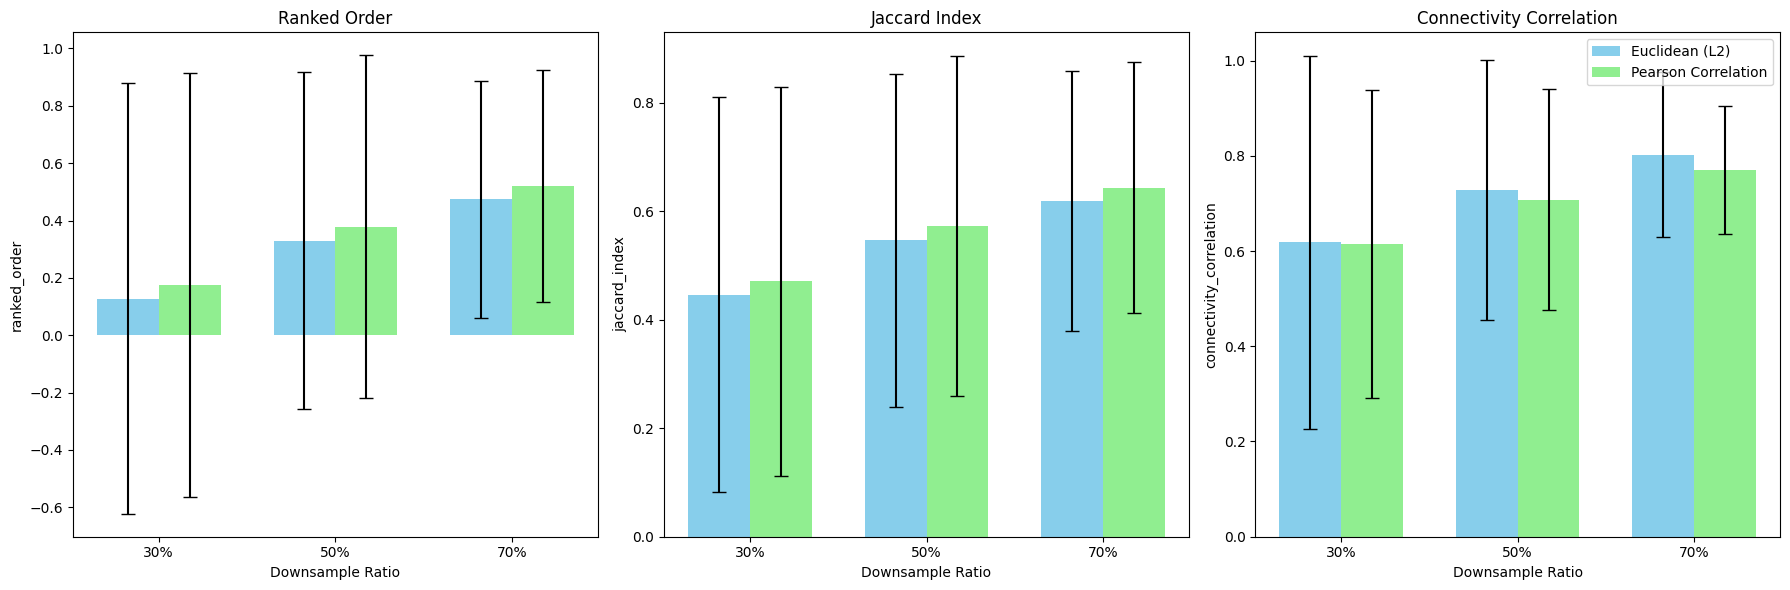

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection
from scipy import stats


# Read the data
df = pd.read_csv('noise_KNN_4.csv')
df = df[df['dataset'] != 'Cano']

# Replace metric names for better readability
df['Metric'] = df['metric'].replace({
    'l2': 'Euclidean (L2)',
    'correlation': 'Pearson Correlation'
})

# Initialize subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=False)

# Metrics to plot
metrics_to_plot = ['ranked_order', 'jaccard_index', 'connectivity_correlation']
titles = ['Ranked Order', 'Jaccard Index', 'Connectivity Correlation']

# Iterate over metrics for subplots
for i, metric in enumerate(metrics_to_plot):
    # Calculate mean, SEM, and CI grouped by downsample_ratio and Metric
    grouped = df.groupby(['downsample_ratio', 'Metric'])[metric]
    means = grouped.mean()
    stds = grouped.std()
    counts = grouped.count()
    sems = stds / np.sqrt(counts)
    confidence = 0.95
    h = sems * stats.t.ppf((1 + confidence) / 2., counts - 1)
    
    stats_df = pd.DataFrame({
        'Mean': means,
        'SEM': sems,
        'CI': h,
        'Count': counts
    }).reset_index()

    # Pivot for plotting
    pivot_df = stats_df.pivot(index='downsample_ratio', columns='Metric', values=['Mean', 'CI'])

    # Prepare data for plotting
    euclidean_means = pivot_df['Mean']['Euclidean (L2)'].values
    euclidean_CIs = pivot_df['CI']['Euclidean (L2)'].values

    pearson_means = pivot_df['Mean']['Pearson Correlation'].values
    pearson_CIs = pivot_df['CI']['Pearson Correlation'].values

    # Plotting
    ratios = sorted(df['downsample_ratio'].unique())
    ratio_labels = [f"{int(ratio*100)}%" for ratio in ratios]
    x = np.arange(len(ratios))
    bar_width = 0.35

    ax = axes[i]
    ax.bar(x - bar_width/2, euclidean_means, yerr=euclidean_CIs, 
           width=bar_width, label='Euclidean (L2)', capsize=5, color='skyblue')
    ax.bar(x + bar_width/2, pearson_means, yerr=pearson_CIs, 
           width=bar_width, label='Pearson Correlation', capsize=5, color='lightgreen')
    
    # Set titles and labels
    ax.set_title(titles[i])
    ax.set_xlabel('Downsample Ratio')
    ax.set_xticks(x)
    ax.set_xticklabels(ratio_labels)
    ax.set_ylabel(metric)

    # Add legend
    if i == 2:  # Only on the last subplot
        ax.legend(loc='upper right')

# Perform paired t-tests for each downsample_ratio
p_values = {metric: [] for metric in metrics_to_plot}
for ratio in [0.3, 0.5, 0.7]:
    for metric in metrics_to_plot:
        subset = df[df['downsample_ratio'] == ratio]
        euclidean_scores = subset[subset['Metric'] == 'Euclidean (L2)'][metric]
        correlation_scores = subset[subset['Metric'] == 'Pearson Correlation'][metric]
        t_stat, p_value = ttest_rel(correlation_scores, euclidean_scores, alternative='greater')
        p_values[metric].append((ratio, p_value))
        print(f'Paired t-test for {metric}, downsample_ratio {ratio}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4e}')

# FDR correction for p-values
for metric in metrics_to_plot:
    p_value_list = [p[1] for p in p_values[metric]]
    _, corrected_p_values = fdrcorrection(p_value_list, alpha=0.05)
    print(f'FDR-corrected p-values for {metric}:', corrected_p_values)

plt.tight_layout()
plt.show()

In [4]:
p_values

{'ranked_order': [(0.5, 0.13104909429154513),
  (0.3, 0.013831473743767243),
  (0.7, 0.1446102014770245)],
 'jaccard_index': [(0.5, 0.11870136915359135),
  (0.3, 0.0363406392935988),
  (0.7, 0.1769181780193395)],
 'connectivity_correlation': [(0.5, 0.8693728862293106),
  (0.3, 0.547247018189972),
  (0.7, 0.9503378986429214)]}

In [5]:
df = pd.read_csv('noise_KNN.csv')
df = df[df['dataset'] != 'TMSfacs']
df

,dataset,metric,downsample_ratio,ranked_order,jaccard_index,connectivity_correlation
0,TSfacs,l2,0.5,-0.145123,0.587738,0.777490
1,TSfacs,correlation,0.5,-0.041145,0.666612,0.792631
2,TSfacs,l2,0.3,-0.263958,0.520600,0.719230
3,TSfacs,correlation,0.3,-0.241212,0.566785,0.729927
4,TSfacs,l2,0.7,-0.117697,0.579537,0.764839
5,TSfacs,correlation,0.7,-0.025052,0.667047,0.787816
6,TMSdrop,l2,0.7,-0.326680,0.524835,0.728203
7,TMSdrop,correlation,0.7,-0.325222,0.522559,0.691406
8,TMSdrop,l2,0.3,-0.592030,0.264550,0.416443
9,TMSdrop,correlation,0.3,-0.577816,0.277409,0.430860
